In [1]:
from google.colab import drive
drive.mount('/content/drive')

#Importamos el google.colab desde el drive

Mounted at /content/drive


In [2]:
#importamos librería de python necesarias para nuestro análisis
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,MinMaxScaler

import folium
import plotly.express as px

In [3]:
#leemos el fichero de bmw
df_bmw=pd.read_csv("/content/drive/MyDrive/ADB/Master Data Science/Proyecto #1 - BMW/bmw_pricing_v2.csv")

In [4]:
df_bmw.head() #Vemos las primeras 5 filas con todas las columnas para tener un primer entendimiento del dataframe

,marca,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,BMW,118,140411.0,100.0,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,2018-01-01
1,BMW,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2018-02-01
2,BMW,320,183297.0,120.0,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,2018-02-01
3,BMW,420,128035.0,135.0,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,2018-02-01
4,BMW,425,97097.0,160.0,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [5]:
df_bmw['marca'].value_counts() #Observamos que la columna marca sólo tiene 1 dato, con lo cual procederíamos luego a eliminarla ya que no nos aportará ningún valor a nuestro objetivo

BMW    4841
Name: marca, dtype: int64

In [6]:
df_bmw.info() #Vemos a simple vista la información en cuanto a tipos de datos de las variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4843 entries, 0 to 4842
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   marca                        4841 non-null   object 
 1   modelo                       4840 non-null   object 
 2   km                           4841 non-null   float64
 3   potencia                     4842 non-null   float64
 4   fecha_registro               4842 non-null   object 
 5   tipo_gasolina                4838 non-null   object 
 6   color                        4831 non-null   object 
 7   tipo_coche                   4834 non-null   object 
 8   volante_regulable            4839 non-null   object 
 9   aire_acondicionado           4841 non-null   object 
 10  camara_trasera               4841 non-null   object 
 11  asientos_traseros_plegables  4839 non-null   object 
 12  elevalunas_electrico         4841 non-null   object 
 13  bluetooth         

In [7]:
df_bmw.isnull().sum() #Observamos cuántos nulls tiene cada columna

marca                           2
modelo                          3
km                              2
potencia                        1
fecha_registro                  1
tipo_gasolina                   5
color                          12
tipo_coche                      9
volante_regulable               4
aire_acondicionado              2
camara_trasera                  2
asientos_traseros_plegables     4
elevalunas_electrico            2
bluetooth                       4
gps                             0
alerta_lim_velocidad            2
precio                          6
fecha_venta                     1
dtype: int64

In [8]:
len(df_bmw[df_bmw.duplicated()]) #Identificamos si existen duplicados dentro del df

0

In [9]:
df_bmw['tipo_coche'].value_counts() #Verificamos cuántos tipos de tipo_coche existen, por un posible agrupamiento o eliminación de los datos

estate         1604
sedan          1167
suv            1057
hatchback       699
subcompact      113
coupe           104
convertible      47
van              43
Name: tipo_coche, dtype: int64

In [10]:
for i in df_bmw:
	print(i) #para imprimir las columnas
	print(i, df_bmw[i].value_counts())  #Buscamos ver de manera rápida las variables no numéricas, por si existe otro caso igual al de la columna marca

marca
marca BMW    4841
Name: marca, dtype: int64
modelo
modelo 320                752
520                633
318                568
X3                 438
116                358
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64
km
km 123492.0    2
120833.0    2
180232.0    2
124822.0    2
116708.0    2
           ..
133178.0    1
105959.0    1
193231.0    1
84058.0     1
195840.0    1
Name: km, Length: 4784, dtype: int64
potencia
potencia 135.0    882
120.0    785
85.0     631
100.0    570
105.0    451
        ... 
224.0      1
121.0      1
239.0      1
236.0      1
261.0      1
Name: potencia, Length: 61, dtype: int64
fecha_registro
fecha_registro 2013-07-01    173
2014-03-01    162
2014-05-01    153
2013-01-01    148
2013-09-01    148
             ... 
2000-01-01      1
1990-03-01      1
1996-10-01      1
2017-03-01      1
2007-12-01      1
Name: fecha_regis

In [11]:
df_bmw2 = df_bmw.copy() #Realizamos una copia antes de eliminar la columna marca

In [12]:
del(df_bmw2['marca']) #Eliminamos la columna marca

In [13]:
df_bmw2 #Chequeamos que se haya eliminado de manera efectiva

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,diesel,black,convertible,True,True,False,False,True,True,True,False,11300.0,2018-01-01
1,M4,13929.0,317.0,2016-04-01,petrol,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,diesel,white,convertible,False,False,False,False,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,2014-07-01,diesel,red,convertible,True,True,False,False,True,True,True,True,25100.0,2018-02-01
4,425,97097.0,160.0,2014-12-01,diesel,silver,convertible,True,True,False,False,False,True,True,True,33400.0,2018-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,218 Gran Tourer,39743.0,110.0,2015-10-01,diesel,black,van,False,True,False,False,False,False,True,False,14600.0,2018-08-01
4839,218 Active Tourer,49832.0,100.0,2015-06-01,diesel,grey,van,False,True,False,False,False,False,True,True,17500.0,2018-08-01
4840,218 Gran Tourer,19633.0,110.0,2015-10-01,diesel,grey,van,False,True,False,False,False,False,True,True,17000.0,2018-09-01
4841,218 Active Tourer,27920.0,110.0,2016-04-01,diesel,brown,van,True,True,False,False,False,False,True,True,22700.0,2018-09-01


In [14]:
df_bmw2[df_bmw2['modelo'].isnull()] #Observamos los nulos de la columna modelo, para ver si eliminamos las filas o realizamos otra acción diferente

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
173,NaN,146338.0,105.0,2014-01-01,diesel,black,estate,False,True,False,False,False,False,True,True,13300.0,2018-08-01
4766,NaN,115566.0,105.0,2014-01-01,diesel,silver,suv,False,True,False,True,True,False,True,False,14900.0,2018-09-01
4802,NaN,118640.0,110.0,2014-09-01,diesel,white,van,False,False,False,False,False,False,False,False,800.0,2018-03-01


In [15]:
df_bmw2[df_bmw2['tipo_gasolina'].isnull()] #Observamos los nulos de la columna tipo_gasolina, para ver si eliminamos las filas o realizamos otra acción diferente

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
82,420,54993.0,135.0,2014-03-01,NaN,black,coupe,False,False,False,False,False,False,False,False,18400.0,2018-03-01
185,320,186697.0,135.0,2012-11-01,NaN,white,estate,False,False,False,False,False,False,False,True,2400.0,2018-04-01
444,318,111622.0,100.0,2013-01-01,NaN,black,estate,True,True,False,False,False,False,True,True,15400.0,2018-02-01
480,318,170350.0,105.0,2014-02-01,NaN,white,estate,False,True,False,False,False,False,True,False,10200.0,2018-02-01
630,318,147558.0,105.0,2014-11-01,NaN,white,estate,False,True,False,False,False,False,False,True,100.0,2018-03-01


In [16]:
df_bmw2[df_bmw2['color'].isnull()] #Observamos los nulos de la columna color, para ver si eliminamos las filas o realizamos otra acción diferente

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
239,318,132731.0,100.0,2013-09-01,diesel,NaN,estate,True,True,False,False,False,False,True,True,12500.0,2018-01-01
834,318,148429.0,100.0,2013-06-01,diesel,NaN,estate,False,True,False,False,False,True,True,False,10500.0,2018-04-01
855,318,139736.0,100.0,2009-02-01,diesel,NaN,estate,False,False,False,False,False,False,True,False,5800.0,2018-04-01
864,318,157661.0,100.0,2013-06-01,diesel,NaN,estate,False,True,False,False,False,False,True,False,7700.0,2018-04-01
884,320,145981.0,122.0,2013-07-01,diesel,NaN,estate,True,True,False,False,True,True,True,False,15800.0,2018-04-01
904,320,126425.0,120.0,2013-07-01,diesel,NaN,estate,False,True,False,False,False,False,True,False,13000.0,2018-04-01
939,520,153102.0,140.0,2015-04-01,diesel,NaN,estate,True,True,True,False,True,False,True,False,19800.0,2018-04-01
1569,318,191804.0,100.0,2013-10-01,diesel,NaN,estate,False,True,False,False,True,True,True,False,3800.0,2018-07-01
1591,320,130624.0,120.0,2013-07-01,diesel,NaN,estate,True,True,False,False,False,False,True,True,10700.0,2018-07-01
1612,330,23811.0,190.0,2015-12-01,diesel,NaN,estate,True,True,True,False,False,False,True,True,28900.0,2018-08-01


In [17]:
df_bmw3 = df_bmw2.copy() #generamos una copia para eliminar todos los nulos, ya que no son muchos sobre el total del universo

In [18]:
df_bmw3.dropna(inplace = True) 

In [19]:
df_bmw3.isnull().sum() #Validamos que no existan nuevos nulos

modelo                         0
km                             0
potencia                       0
fecha_registro                 0
tipo_gasolina                  0
color                          0
tipo_coche                     0
volante_regulable              0
aire_acondicionado             0
camara_trasera                 0
asientos_traseros_plegables    0
elevalunas_electrico           0
bluetooth                      0
gps                            0
alerta_lim_velocidad           0
precio                         0
fecha_venta                    0
dtype: int64

modelo 
 320                738
520                625
318                552
X3                 437
116                356
                  ... 
M135                 1
225                  1
i8                   1
630                  1
214 Gran Tourer      1
Name: modelo, Length: 76, dtype: int64 

[[<Axes: title={'center': 'km'}>]]
[[<Axes: title={'center': 'potencia'}>]]
fecha_registro 
 2013-07-01    168
2014-03-01    161
2014-05-01    148
2013-09-01    146
2013-10-01    143
             ... 
2000-01-01      1
1990-03-01      1
1996-10-01      1
2017-03-01      1
2007-12-01      1
Name: fecha_registro, Length: 199, dtype: int64 

tipo_gasolina 
 diesel           4578
petrol            189
hybrid_petrol       8
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64 

color 
 black     1615
grey      1163
blue       699
white      526
brown      340
silver     324
red         51
beige       41
green       18
orange       6
Name: color, dtype: int64 

tipo_coc

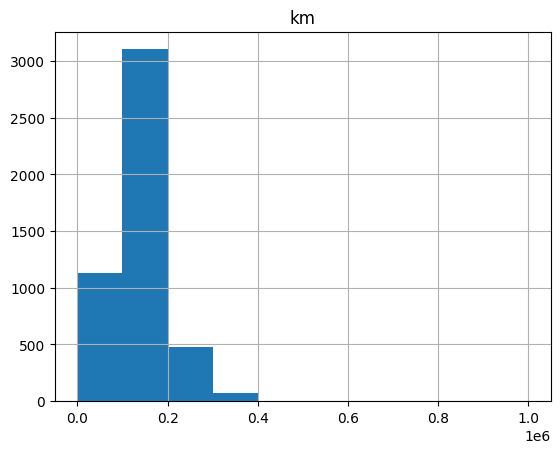

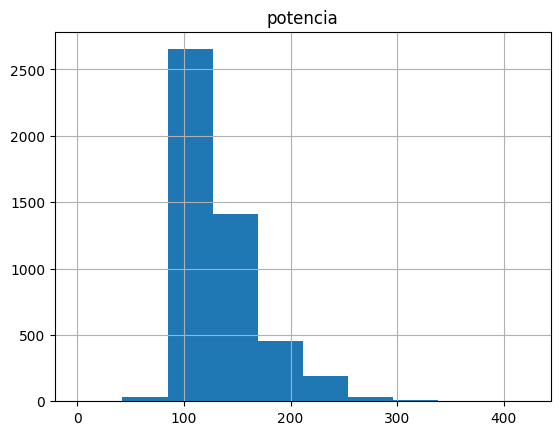

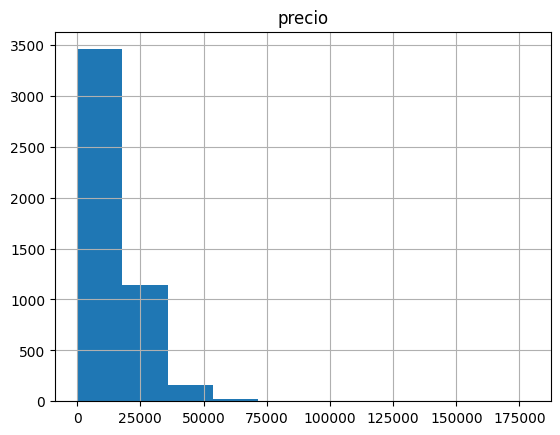

In [20]:
for i in df_bmw3:
  if df_bmw3[i].dtype.kind == "O":
    print(i,'\n', df_bmw3[i].value_counts(), '\n')
  elif (df_bmw3[i].dtype.kind=="f") or (df_bmw3[i].dtype.kind=="i"):
    print(df_bmw3.hist(i))  #Ver las columnas numericas

<Axes: xlabel='km', ylabel='precio'>

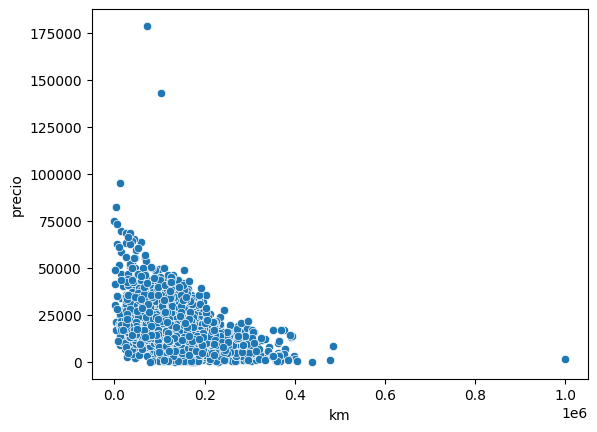

In [21]:
sns.scatterplot(x="km", y="precio", data=df_bmw3) #VARIABLE NUMERICA

#Observamos algunos posibles outliers por precio, luego lo tendremos en cuenta.

In [22]:
df_bmw3[df_bmw3["km"]<200] #Validamos si existen valor demasido bajos

#Eliminaremos la fila con km negativos

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
2938,640 Gran Coupé,-64.0,230.0,2017-03-01,diesel,black,sedan,True,True,False,True,False,False,True,True,75000.0,2018-04-01


In [23]:
df_bmw3[df_bmw3["km"]>1000000] #Validamos si existen valor demasido altos

#Eliminaremos la fila con km de más de 1M

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
3732,118,1000376.0,90.0,2005-03-01,diesel,black,subcompact,True,False,False,False,False,False,True,False,1400.0,2018-06-01


In [24]:
df_bmw4 = df_bmw3.copy() #Generamos una copia para eliminar los outliers de kilometros

In [25]:
df_bmw4.drop(df_bmw4[df_bmw4['km'] >1000000].index, inplace=True) #Eliminamos km > 1M

In [26]:
df_bmw4.drop(df_bmw4[df_bmw4['km'] <0].index, inplace=True) #Eliminamos km negativos

<Axes: xlabel='km', ylabel='precio'>

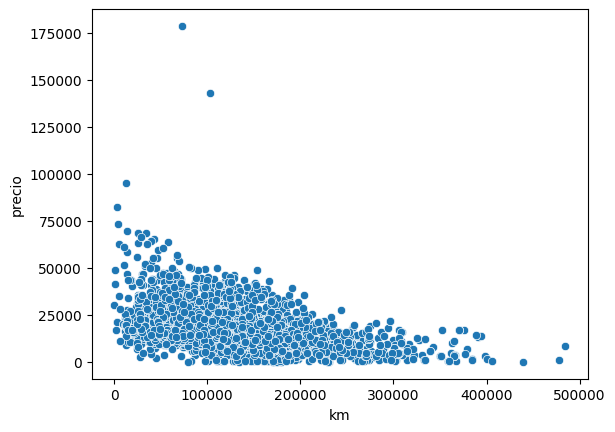

In [27]:
sns.scatterplot(x="km", y="precio", data=df_bmw4) #VARIABLE NUMERICA

#Observamos algunos posibles outliers por precio, luego lo tendremos en cuenta.
#Validamos que se hayan eliminado los outliers de km 

In [28]:
df_bmw4[df_bmw4["km"]>450000] #Validamos si siguen existiendo valores demasidos altos

#Eliminaremos la fila con km de más de 450.000

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
557,520,484615.0,120.0,2011-02-01,diesel,blue,estate,True,True,False,False,False,False,True,False,8300.0,2018-03-01
2350,318,477571.0,85.0,2004-09-01,diesel,grey,hatchback,False,True,False,False,False,True,False,False,1200.0,2018-07-01


In [29]:
df_bmw4.drop(df_bmw4[df_bmw4['km'] >450000].index, inplace=True)

<Axes: xlabel='km', ylabel='precio'>

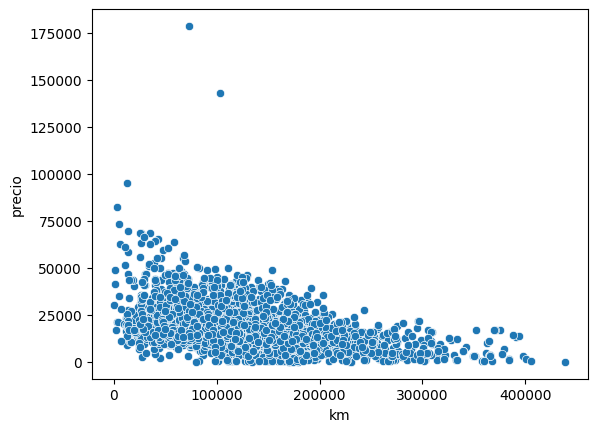

In [30]:
sns.scatterplot(x="km", y="precio", data=df_bmw4) #VARIABLE NUMERICA

In [31]:
df_bmw5 = df_bmw4.copy() #Generamos una copia para analizar la columna potencia

<Axes: xlabel='potencia', ylabel='precio'>

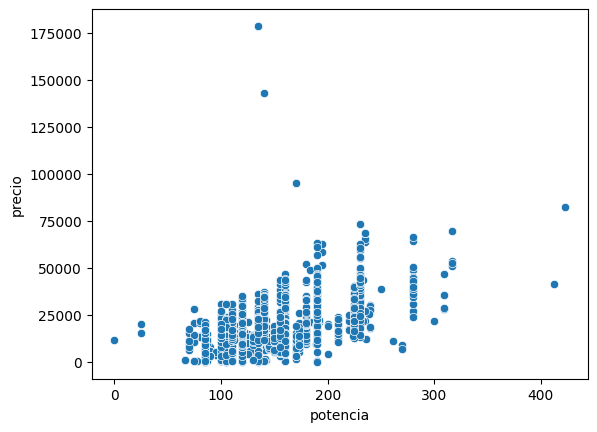

In [32]:
sns.scatterplot(x="potencia", y="precio", data=df_bmw5) #VARIABLE NUMERICA

#Analizamos a simple vista si existen outliers en la columna de potencia
#Vemos algunos datos con potencias muy bajas, como también muy elevadas

<Axes: xlabel='tipo_gasolina', ylabel='precio'>

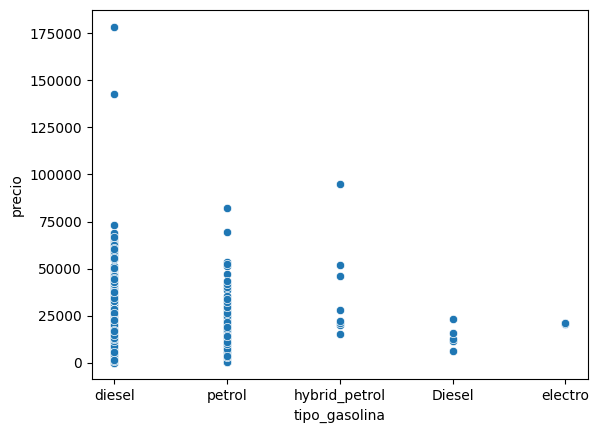

In [33]:
sns.scatterplot(x="tipo_gasolina", y="precio", data=df_bmw5) #VARIABLE NUMERICA

#Analizamos si es que influye el precio según el tipo de gasolina

<Axes: xlabel='tipo_gasolina', ylabel='potencia'>

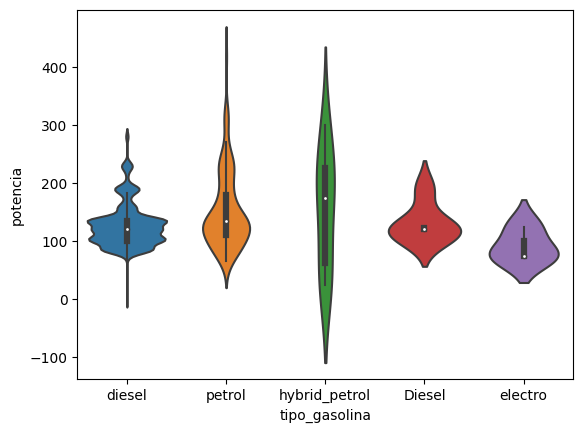

In [34]:
sns.violinplot(x="tipo_gasolina", y="potencia", data=df_bmw5) #VARIABLE NO NUMERICA

#Analizamos la correlación entre la potencia y el tipo de gasolina

#Observamos que existen varios coches con una potencia muy baja

In [35]:
df_bmw5[df_bmw5["potencia"]<70] #Vemos que existen 5 filas con potencia menor a una potencia de 70

#Procedemos a analizar por value_counts() por tipo de gasolina

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1796,i3,152328.0,25.0,2014-02-01,hybrid_petrol,black,hatchback,False,True,False,False,False,False,True,True,20300.0,2018-04-01
1925,i3,152470.0,25.0,2014-02-01,hybrid_petrol,black,hatchback,False,True,False,False,False,False,True,True,15500.0,2018-03-01
2390,318,170529.0,66.0,2000-05-01,diesel,silver,hatchback,False,False,True,False,False,False,False,False,1000.0,2018-08-01
2771,316,146951.0,66.0,1990-03-01,petrol,white,sedan,False,False,False,False,False,False,False,False,1300.0,2018-04-01
3765,X1,81770.0,0.0,2014-10-01,diesel,white,suv,False,False,False,False,False,False,False,False,11700.0,2018-03-01


In [36]:
df_bmw5["tipo_gasolina"].value_counts()

#Vemos que debemos agrupar los motores diesel

diesel           4574
petrol            189
hybrid_petrol       8
Diesel              5
electro             3
Name: tipo_gasolina, dtype: int64

In [37]:
df_bmw6 = df_bmw5.copy() #Copia antes de estandarizar los valores diesel

In [38]:
df_bmw6["tipo_gasolina"]=df_bmw6["tipo_gasolina"].replace({'diesel':'Diesel'}) #Unificamos los valores

In [39]:
df_bmw6["tipo_gasolina"].value_counts()

#Procedemos a eliminar los coches hybridos y electro ya que son pocas filas para el modelo y no son representativas

Diesel           4579
petrol            189
hybrid_petrol       8
electro             3
Name: tipo_gasolina, dtype: int64

In [40]:
df_bmw6.drop(df_bmw6[df_bmw6["tipo_gasolina"] == "hybrid_petrol"].index, inplace=True)

In [41]:
df_bmw6.drop(df_bmw6[df_bmw6["tipo_gasolina"] == "electro"].index, inplace=True)

In [42]:
df_bmw6["tipo_gasolina"].value_counts()

#Vemos que han quedado solo dos

Diesel    4579
petrol     189
Name: tipo_gasolina, dtype: int64

<Axes: xlabel='tipo_gasolina', ylabel='precio'>

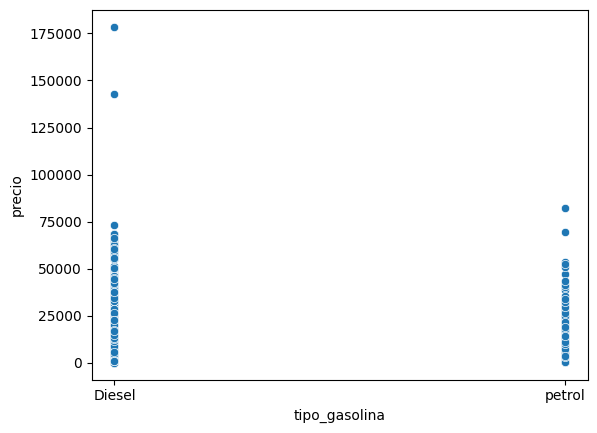

In [43]:
sns.scatterplot(x="tipo_gasolina", y="precio", data=df_bmw6) #VARIABLE NUMERICA

#Observamos que no existe una diferencia en el precio entre tipo de gasolina

#Luego de analizar varias variables, llegamo a la conclusión de volver sobre una copia del DF anterior y eliminar directamente la columna tipo_gasolina, y luego ver si existen outliers sobre otras columnas (precio, potencia, km)

In [44]:
df_bmw5[df_bmw5["potencia"]<70] #Vemos que existen 5 filas con potencia menor a una potencia de 70

#Eliminamos estas 5 filas

,modelo,km,potencia,fecha_registro,tipo_gasolina,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
1796,i3,152328.0,25.0,2014-02-01,hybrid_petrol,black,hatchback,False,True,False,False,False,False,True,True,20300.0,2018-04-01
1925,i3,152470.0,25.0,2014-02-01,hybrid_petrol,black,hatchback,False,True,False,False,False,False,True,True,15500.0,2018-03-01
2390,318,170529.0,66.0,2000-05-01,diesel,silver,hatchback,False,False,True,False,False,False,False,False,1000.0,2018-08-01
2771,316,146951.0,66.0,1990-03-01,petrol,white,sedan,False,False,False,False,False,False,False,False,1300.0,2018-04-01
3765,X1,81770.0,0.0,2014-10-01,diesel,white,suv,False,False,False,False,False,False,False,False,11700.0,2018-03-01


In [45]:
df_bmw7 = df_bmw5.copy() #Generamos una copia para eliminar la columna tipo_gasolina

In [46]:
del(df_bmw7['tipo_gasolina'])

In [47]:
df_bmw7.drop(df_bmw7[df_bmw7["potencia"] < 70].index, inplace=True)

<Axes: xlabel='potencia', ylabel='precio'>

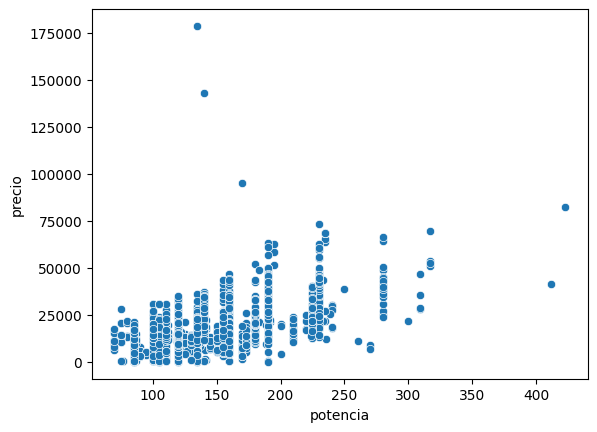

In [48]:
sns.scatterplot(x="potencia", y="precio", data=df_bmw7) #VARIABLE NUMERICA


In [49]:
df_bmw7[df_bmw7["potencia"]>350] 


,modelo,km,potencia,fecha_registro,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
3601,M5,150187.0,412.0,2012-02-01,white,sedan,True,True,True,False,True,True,True,True,41600.0,2018-09-01
4146,X6 M,2970.0,423.0,2016-04-01,red,suv,True,True,True,False,False,False,True,True,82400.0,2018-04-01


In [50]:
df_bmw7[df_bmw7["modelo"] == "X6 M"] #Eliminamos la fila con potencia en 423 ya que corresponde a un outlier si lo comparamos con el resto de las filas del mismo modelo de coche

,modelo,km,potencia,fecha_registro,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
3829,X6 M,39725.0,280.0,2016-05-01,black,suv,False,True,False,True,True,True,True,False,64300.0,2018-01-01
3986,X6 M,115569.0,280.0,2013-06-01,grey,suv,True,True,False,True,False,True,True,True,34800.0,2018-06-01
4109,X6 M,67798.0,190.0,2015-02-01,black,suv,True,True,True,True,False,True,True,True,57100.0,2018-03-01
4146,X6 M,2970.0,423.0,2016-04-01,red,suv,True,True,True,False,False,False,True,True,82400.0,2018-04-01
4166,X6 M,53221.0,180.0,2014-04-01,white,suv,True,True,True,True,False,True,True,True,42800.0,2018-04-01
4282,X6 M,90157.0,190.0,2015-05-01,white,suv,True,True,True,True,True,True,True,True,48800.0,2018-05-01
4535,X6 M,94673.0,225.0,2013-10-01,blue,suv,True,True,True,True,False,False,True,True,39500.0,2018-07-01
4557,X6 M,124726.0,280.0,2013-07-01,black,suv,True,True,True,True,True,True,True,True,38700.0,2018-07-01


In [51]:
df_bmw7.drop(df_bmw7[df_bmw7["potencia"] > 400].index, inplace=True)

<Axes: xlabel='potencia', ylabel='precio'>

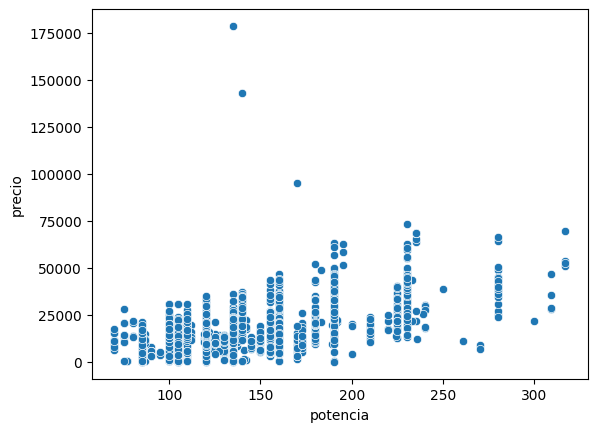

In [52]:
sns.scatterplot(x="potencia", y="precio", data=df_bmw7) #VARIABLE NUMERICA

In [53]:
df_bmw7.describe() #Observamos sin entrar en detalle si exsiten datos erróneos

,km,potencia,precio
count,4772.000000,4772.000000,4772.000000
mean,140537.145013,129.059304,15857.103940
std,58492.720705,38.512834,9135.289646
min,476.000000,70.000000,100.000000
25%,102485.500000,100.000000,10900.000000
50%,140666.000000,120.000000,14200.000000
75%,175172.500000,135.000000,18700.000000
max,439060.000000,317.000000,178500.000000


In [54]:
df_bmw8 = df_bmw7.copy()

<Axes: xlabel='precio'>

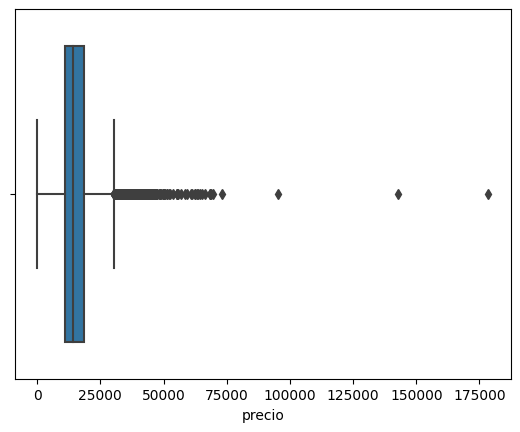

In [55]:
sns.boxplot(x=df_bmw8["precio"]) 

#Vemos que existen outliers, procedemos a analizarlos

In [56]:
df_bmw8[df_bmw8["precio"]>100000]

#Procedemos a analizar si el modelo es acorde al precio

,modelo,km,potencia,fecha_registro,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
4684,X4,103222.0,140.0,2014-08-01,grey,suv,True,True,False,False,True,False,True,True,142800.0,2018-08-01
4753,X3,72515.0,135.0,2013-03-01,blue,suv,False,False,True,False,False,False,False,True,178500.0,2018-08-01


In [57]:
df_bmw8[(df_bmw8["modelo"] == "X4") & (df_bmw8["precio"]>40000)] 

#Vemos que efectivamente el coche con modelo X4 y precio superior a 100.000 es un outlier ya que de media, el precio del mismo modelo es inferior a 40.000

,modelo,km,potencia,fecha_registro,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
4092,X4,56981.0,230.0,2015-04-01,black,suv,True,True,True,True,False,True,True,True,47400.0,2018-03-01
4684,X4,103222.0,140.0,2014-08-01,grey,suv,True,True,False,False,True,False,True,True,142800.0,2018-08-01


In [58]:
df_bmw8[(df_bmw8["modelo"] == "X3") & (df_bmw8["precio"]>40000)] 

#Vemos que efectivamente el coche con modelo X3 y precio superior a 100.000 es un outlier ya que de media, el precio del mismo modelo es inferior a 40.000

,modelo,km,potencia,fecha_registro,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
4260,X3,27253.0,190.0,2015-10-01,grey,suv,True,True,False,True,True,True,True,True,42400.0,2018-05-01
4753,X3,72515.0,135.0,2013-03-01,blue,suv,False,False,True,False,False,False,False,True,178500.0,2018-08-01


In [59]:
df_bmw8.drop(df_bmw8[df_bmw8["precio"] > 100000].index, inplace=True) #Eliminamos las filas correspondientes

<Axes: xlabel='precio'>

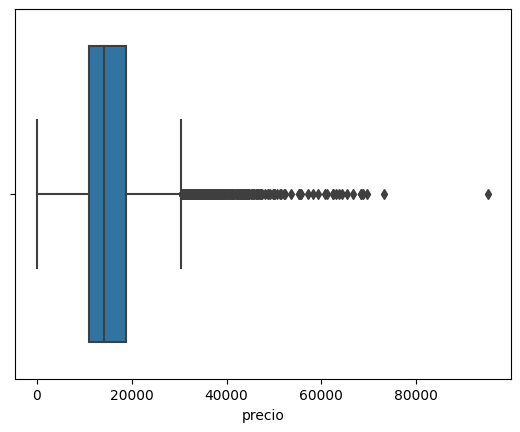

In [60]:
sns.boxplot(x=df_bmw8["precio"]) 

#Vemos que existen outliers, procedemos a analizarlos

In [61]:
df_bmw9 = df_bmw8.copy() #Generamos una copia para analizar posibles outliers que siguen dentro del modelo por precio

In [62]:
df_bmw9[df_bmw9["precio"]>70000]

#Procedemos a analizar si el modelo es acorde al precio

,modelo,km,potencia,fecha_registro,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
90,i8,12402.0,170.0,2016-01-01,grey,coupe,True,True,False,False,False,False,False,True,95200.0,2018-04-01
4731,X5 M,4530.0,230.0,2016-07-01,silver,suv,True,True,False,True,False,False,False,True,73100.0,2018-08-01


In [63]:
df_bmw9[(df_bmw9["modelo"] == "i8") & (df_bmw9["precio"]>1000)] 

#Vemos que efectivamente el coche con modelo i8 lo eliminamos ya que sólo existe esta fila como referencia

,modelo,km,potencia,fecha_registro,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
90,i8,12402.0,170.0,2016-01-01,grey,coupe,True,True,False,False,False,False,False,True,95200.0,2018-04-01


In [64]:
df_bmw9[(df_bmw9["modelo"] == "X5 M") & (df_bmw9["precio"]>50000)] 

#No estamos seguros de que realmente sea un outlier, por lo que por el momento lo eliminaremos

,modelo,km,potencia,fecha_registro,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
4110,X5 M,25931.0,190.0,2016-01-01,white,suv,True,True,False,False,False,False,True,True,63100.0,2018-04-01
4731,X5 M,4530.0,230.0,2016-07-01,silver,suv,True,True,False,True,False,False,False,True,73100.0,2018-08-01


In [65]:
df_bmw9.drop(df_bmw9[df_bmw9["precio"] > 90000].index, inplace=True) #Eliminamos las filas correspondientes

<Axes: xlabel='precio'>

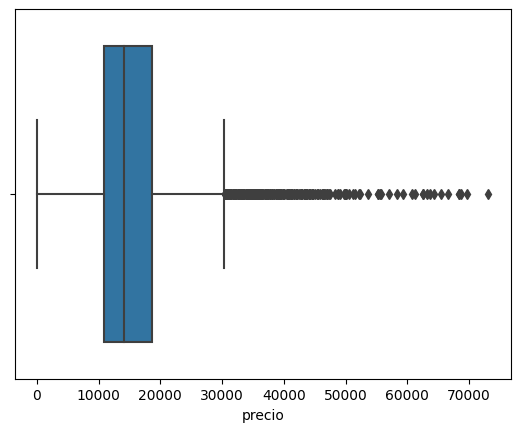

In [66]:
sns.boxplot(x=df_bmw9["precio"]) 

#Vemos cómo queda el boxplot luego de las eliminaciones

In [67]:
len(df_bmw9[df_bmw9["precio"]<1000])

#Procedemos a analizar si es necesario tener coches por debajo de los mil euros

57

In [68]:
df_bmw9.to_pickle("/content/drive/MyDrive/ADB/Master Data Science/Proyecto #1 - BMW/Proy_BMW_analisis_2") #HACER UN PICKLE - GUARDAR COMO (para no ejecutar cada linea desde el inicio al final)

In [69]:
df_bmw10 = df_bmw9.copy()

array([[<Axes: title={'center': 'km'}>,
        <Axes: title={'center': 'potencia'}>],
       [<Axes: title={'center': 'precio'}>, <Axes: >]], dtype=object)

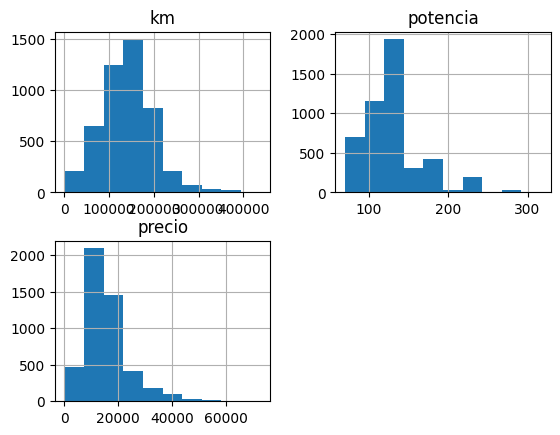

In [70]:
df_bmw10.hist() #para ver las variables numéricas

In [71]:
df_bmw10.corr()

<ipython-input-71-6d9a459768d0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_bmw10.corr()


,km,potencia,gps,precio
km,1.000000,-0.040551,0.161229,-0.428656
potencia,-0.040551,1.000000,0.002121,0.674042
gps,0.161229,0.002121,1.000000,0.006373
precio,-0.428656,0.674042,0.006373,1.000000


In [72]:
df_bmw10.head()

,modelo,km,potencia,fecha_registro,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta
0,118,140411.0,100.0,2012-02-01,black,convertible,True,True,False,False,True,True,True,False,11300.0,2018-01-01
1,M4,13929.0,317.0,2016-04-01,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2018-02-01
2,320,183297.0,120.0,2012-04-01,white,convertible,False,False,False,False,True,False,True,False,10200.0,2018-02-01
3,420,128035.0,135.0,2014-07-01,red,convertible,True,True,False,False,True,True,True,True,25100.0,2018-02-01
4,425,97097.0,160.0,2014-12-01,silver,convertible,True,True,False,False,False,True,True,True,33400.0,2018-04-01


In [73]:
from datetime import datetime  #importamos para poder cambiar los tipos fecha

In [74]:
df_bmw10['fecha_registro']=pd.to_datetime(df_bmw10['fecha_registro']) # Convertimos la columna 'fecha_registro' al formato de fecha

# Extraer el año de la columna 'fecha_registro'

df_bmw10['anio_registro']=df_bmw10['fecha_registro'].apply(lambda x:datetime.strftime(x,'%Y'))

In [75]:
df_bmw10.head()

,modelo,km,potencia,fecha_registro,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,fecha_venta,anio_registro
0,118,140411.0,100.0,2012-02-01,black,convertible,True,True,False,False,True,True,True,False,11300.0,2018-01-01,2012
1,M4,13929.0,317.0,2016-04-01,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2018-02-01,2016
2,320,183297.0,120.0,2012-04-01,white,convertible,False,False,False,False,True,False,True,False,10200.0,2018-02-01,2012
3,420,128035.0,135.0,2014-07-01,red,convertible,True,True,False,False,True,True,True,True,25100.0,2018-02-01,2014
4,425,97097.0,160.0,2014-12-01,silver,convertible,True,True,False,False,False,True,True,True,33400.0,2018-04-01,2014


In [76]:
del(df_bmw10['fecha_registro']) 

In [77]:
df_bmw10['fecha_venta']=pd.to_datetime(df_bmw10['fecha_venta']) # Convertimos la columna 'fecha_registro' al formato de fecha

# Extraer el año de la columna 'fecha_registro'

df_bmw10['anio_venta']=df_bmw10['fecha_venta'].apply(lambda x:datetime.strftime(x,'%Y'))

In [78]:
del(df_bmw10['fecha_venta']) 

In [79]:
df_bmw10.head()

,modelo,km,potencia,color,tipo_coche,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,alerta_lim_velocidad,precio,anio_registro,anio_venta
0,118,140411.0,100.0,black,convertible,True,True,False,False,True,True,True,False,11300.0,2012,2018
1,M4,13929.0,317.0,grey,convertible,True,True,False,False,False,True,True,True,69700.0,2016,2018
2,320,183297.0,120.0,white,convertible,False,False,False,False,True,False,True,False,10200.0,2012,2018
3,420,128035.0,135.0,red,convertible,True,True,False,False,True,True,True,True,25100.0,2014,2018
4,425,97097.0,160.0,silver,convertible,True,True,False,False,False,True,True,True,33400.0,2014,2018


<Axes: xlabel='color', ylabel='precio'>

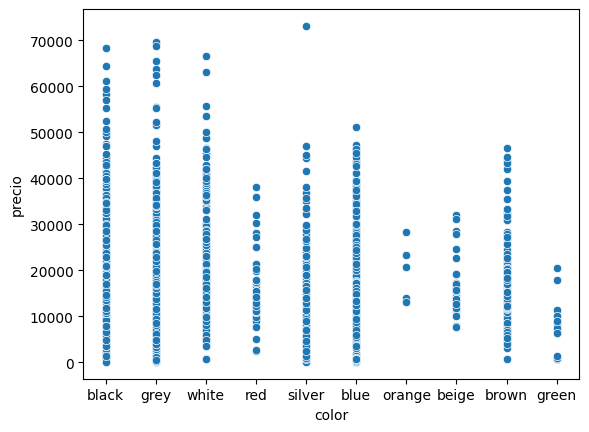

In [80]:
sns.scatterplot(x="color", y="precio", data=df_bmw10) #VARIABLE NUMERICA

#Analizando el gráfico, decidimos eliminar la columna "color" ya que no nos aporta ningún valor agregado para predecir el valor de un coche

In [81]:
del(df_bmw10['color']) 

<Axes: xlabel='tipo_coche', ylabel='precio'>

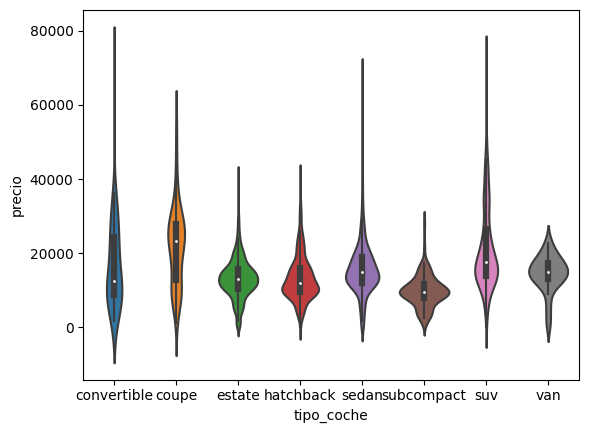

In [82]:
sns.violinplot(x="tipo_coche", y="precio", data=df_bmw10) #VARIABLE NO NUMERICA

<Axes: xlabel='potencia', ylabel='precio'>

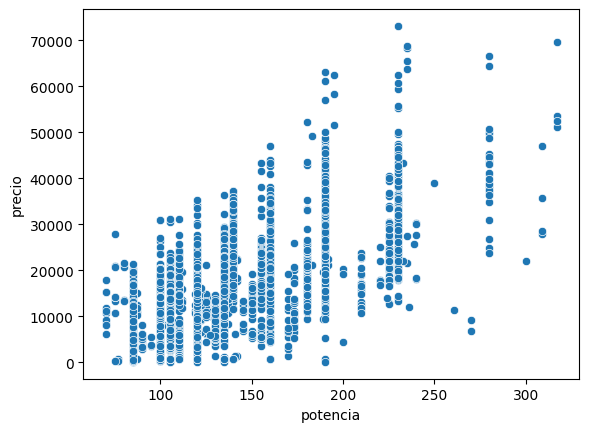

In [83]:
sns.scatterplot(x="potencia", y="precio", data=df_bmw10) #VARIABLE NUMERICA

In [256]:
df_bmw11 = df_bmw10.copy()

In [257]:
df_bmw11["potencia"] = MinMaxScaler().fit_transform(df_bmw11["potencia"].values.reshape(-1,1)) # Reemplazamos con un minmaxscaler la columna potencia

In [258]:
df_bmw11["km"] = MinMaxScaler().fit_transform(df_bmw11["km"].values.reshape(-1,1)) # Reemplazamos con un minmaxscaler la columna km

In [259]:
df_bmw11 = pd.get_dummies(df_bmw11, columns=['tipo_coche']) # Generamos con un one hot encoding las variables para tipo_coche

In [260]:
df_bmw11.head() #Validamos los resultados

,modelo,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,...,anio_registro,anio_venta,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
0,118,0.319061,0.121457,True,True,False,False,True,True,True,...,2012,2018,1,0,0,0,0,0,0,0
1,M4,0.030674,1.000000,True,True,False,False,False,True,True,...,2016,2018,1,0,0,0,0,0,0,0
2,320,0.416844,0.202429,False,False,False,False,True,False,True,...,2012,2018,1,0,0,0,0,0,0,0
3,420,0.290843,0.263158,True,True,False,False,True,True,True,...,2014,2018,1,0,0,0,0,0,0,0
4,425,0.220302,0.364372,True,True,False,False,False,True,True,...,2014,2018,1,0,0,0,0,0,0,0


In [261]:
df_bmw11["anio_venta"].value_counts() #Verificamos si tiene sentido dejar el año de venta

2018    4765
2007       1
2010       1
2009       1
2008       1
Name: anio_venta, dtype: int64

In [262]:
del(df_bmw11['anio_venta'])  #Eliminamos la columna

In [263]:
df_bmw11.head()

,modelo,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,...,precio,anio_registro,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
0,118,0.319061,0.121457,True,True,False,False,True,True,True,...,11300.0,2012,1,0,0,0,0,0,0,0
1,M4,0.030674,1.000000,True,True,False,False,False,True,True,...,69700.0,2016,1,0,0,0,0,0,0,0
2,320,0.416844,0.202429,False,False,False,False,True,False,True,...,10200.0,2012,1,0,0,0,0,0,0,0
3,420,0.290843,0.263158,True,True,False,False,True,True,True,...,25100.0,2014,1,0,0,0,0,0,0,0
4,425,0.220302,0.364372,True,True,False,False,False,True,True,...,33400.0,2014,1,0,0,0,0,0,0,0


In [264]:
df_bmw11.info() #Vemos los tipo de variables para ver si están correctamente identificadas según su dtype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4769 entries, 0 to 4841
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4769 non-null   object 
 1   km                           4769 non-null   float64
 2   potencia                     4769 non-null   float64
 3   volante_regulable            4769 non-null   object 
 4   aire_acondicionado           4769 non-null   object 
 5   camara_trasera               4769 non-null   object 
 6   asientos_traseros_plegables  4769 non-null   object 
 7   elevalunas_electrico         4769 non-null   object 
 8   bluetooth                    4769 non-null   object 
 9   gps                          4769 non-null   bool   
 10  alerta_lim_velocidad         4769 non-null   object 
 11  precio                       4769 non-null   float64
 12  anio_registro                4769 non-null   object 
 13  tipo_coche_convert

In [265]:
#Vemos que todas las columnas de tipo objeto (excepto modelo y anio_registro) deben ser booleanas, procedemos a cambiarlas

for col in df_bmw11:
   if col != 'modelo' and col != 'anio_registro' and df_bmw11[col].dtype == 'O':
      df_bmw11[col] = df_bmw11[col].astype(bool)

In [266]:
df_bmw11.info() #verificamos que se haya ejecutado con éxito

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4769 entries, 0 to 4841
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4769 non-null   object 
 1   km                           4769 non-null   float64
 2   potencia                     4769 non-null   float64
 3   volante_regulable            4769 non-null   bool   
 4   aire_acondicionado           4769 non-null   bool   
 5   camara_trasera               4769 non-null   bool   
 6   asientos_traseros_plegables  4769 non-null   bool   
 7   elevalunas_electrico         4769 non-null   bool   
 8   bluetooth                    4769 non-null   bool   
 9   gps                          4769 non-null   bool   
 10  alerta_lim_velocidad         4769 non-null   bool   
 11  precio                       4769 non-null   float64
 12  anio_registro                4769 non-null   object 
 13  tipo_coche_convert

In [267]:
df_bmw12 = df_bmw11.copy()  #Copy para analizar las variables categóricas y ver si valen la pena que las consideremos en el modelo

In [268]:
df_bmw12["volante_regulable"].value_counts()

True     2629
False    2140
Name: volante_regulable, dtype: int64

<Axes: xlabel='volante_regulable', ylabel='precio'>

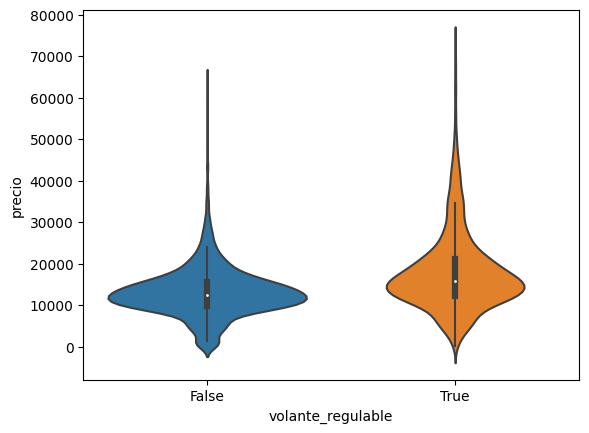

In [269]:
sns.violinplot(x="volante_regulable", y="precio", data=df_bmw12) #VARIABLE NO NUMERICA

#Vemos que existe cierta diferencia con esta variable, por lo que dejaremos la columna para el objetivo del proyecto

In [270]:
df_bmw12["volante_regulable"].value_counts()

True     2629
False    2140
Name: volante_regulable, dtype: int64

<Axes: xlabel='aire_acondicionado', ylabel='precio'>

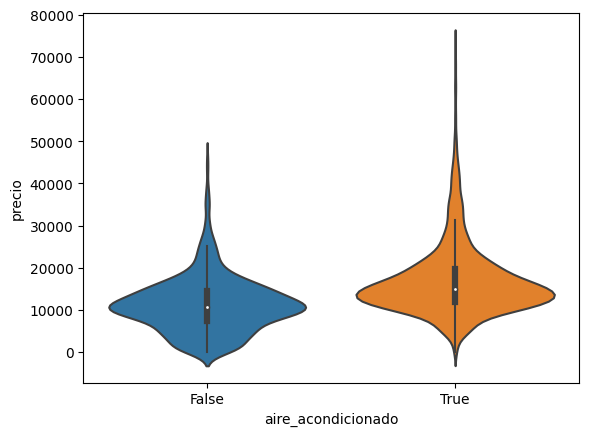

In [271]:
sns.violinplot(x="aire_acondicionado", y="precio", data=df_bmw12) #VARIABLE NO NUMERICA

#Vemos que existe cierta diferencia con esta variable, por lo que dejaremos la columna para el objetivo del proyecto

In [272]:
df_bmw12["aire_acondicionado"].value_counts()

True     3791
False     978
Name: aire_acondicionado, dtype: int64

<Axes: xlabel='camara_trasera', ylabel='precio'>

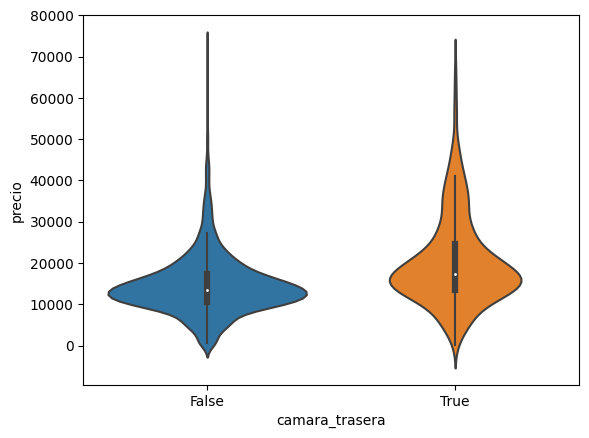

In [273]:
sns.violinplot(x="camara_trasera", y="precio", data=df_bmw12) #VARIABLE NO NUMERICA

#Vemos que existe cierta diferencia con esta variable, por lo que dejaremos la columna para el objetivo del proyecto

In [274]:
df_bmw12["camara_trasera"].value_counts()

False    3808
True      961
Name: camara_trasera, dtype: int64

<Axes: xlabel='asientos_traseros_plegables', ylabel='precio'>

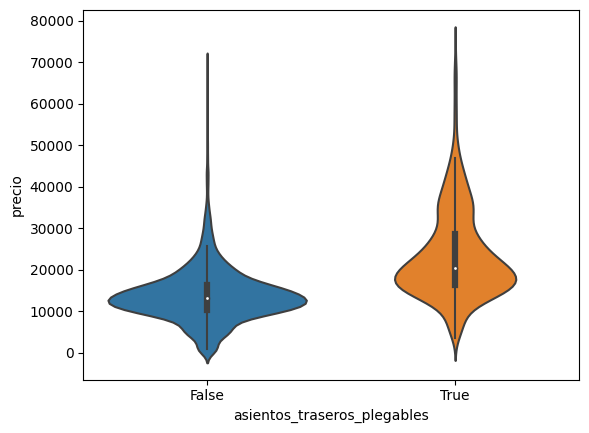

In [275]:
sns.violinplot(x="asientos_traseros_plegables", y="precio", data=df_bmw12) #VARIABLE NO NUMERICA

#Vemos que existe cierta diferencia con esta variable, por lo que dejaremos la columna para el objetivo del proyecto

In [276]:
df_bmw12["asientos_traseros_plegables"].value_counts()

False    3812
True      957
Name: asientos_traseros_plegables, dtype: int64

<Axes: xlabel='elevalunas_electrico', ylabel='precio'>

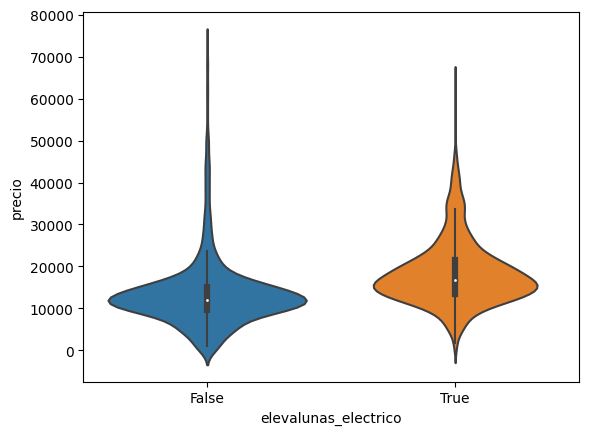

In [277]:
sns.violinplot(x="elevalunas_electrico", y="precio", data=df_bmw12) #VARIABLE NO NUMERICA


#Vemos que existe cierta diferencia con esta variable, por lo que dejaremos la columna para el objetivo del proyecto

In [278]:
df_bmw12["elevalunas_electrico"].value_counts()

False    2566
True     2203
Name: elevalunas_electrico, dtype: int64

<Axes: xlabel='bluetooth', ylabel='precio'>

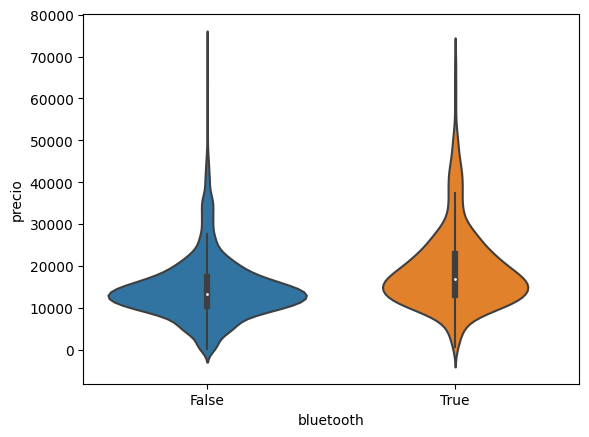

In [279]:
sns.violinplot(x="bluetooth", y="precio", data=df_bmw12) #VARIABLE NO NUMERICA


#Vemos que existe cierta diferencia con esta variable, por lo que dejaremos la columna para el objetivo del proyecto

In [280]:
df_bmw12["bluetooth"].value_counts()

False    3615
True     1154
Name: bluetooth, dtype: int64

<Axes: xlabel='gps', ylabel='precio'>

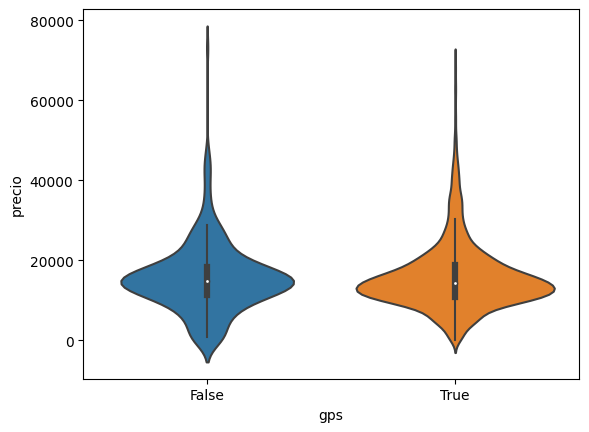

In [281]:
sns.violinplot(x="gps", y="precio", data=df_bmw12) #VARIABLE NO NUMERICA


#Vemos que existe cierta diferencia con esta variable, por lo que dejaremos la columna para el objetivo del proyecto

In [282]:
df_bmw12["gps"].value_counts()

True     4453
False     316
Name: gps, dtype: int64

<Axes: xlabel='alerta_lim_velocidad', ylabel='precio'>

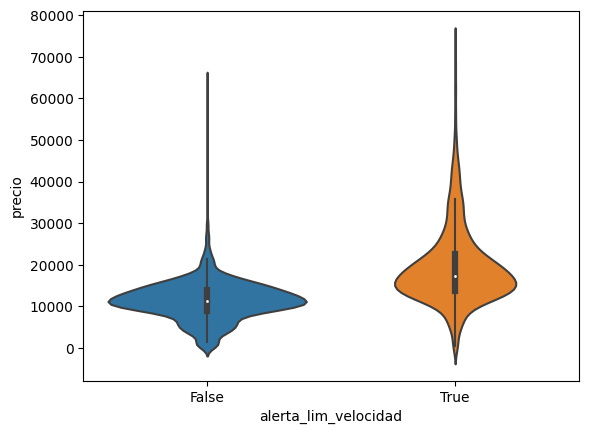

In [283]:
sns.violinplot(x="alerta_lim_velocidad", y="precio", data=df_bmw12) #VARIABLE NO NUMERICA


#Vemos que existe cierta diferencia con esta variable, por lo que dejaremos la columna para el objetivo del proyecto

In [284]:
df_bmw12["alerta_lim_velocidad"].value_counts()

True     2583
False    2186
Name: alerta_lim_velocidad, dtype: int64

In [285]:
df_bmw12.head()

,modelo,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,...,precio,anio_registro,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
0,118,0.319061,0.121457,True,True,False,False,True,True,True,...,11300.0,2012,1,0,0,0,0,0,0,0
1,M4,0.030674,1.000000,True,True,False,False,False,True,True,...,69700.0,2016,1,0,0,0,0,0,0,0
2,320,0.416844,0.202429,False,False,False,False,True,False,True,...,10200.0,2012,1,0,0,0,0,0,0,0
3,420,0.290843,0.263158,True,True,False,False,True,True,True,...,25100.0,2014,1,0,0,0,0,0,0,0
4,425,0.220302,0.364372,True,True,False,False,False,True,True,...,33400.0,2014,1,0,0,0,0,0,0,0


In [286]:
df_bmw12.to_pickle("/content/drive/MyDrive/ADB/Master Data Science/Proyecto #1 - BMW/BMW_EntregaFinal") #HACER UN PICKLE - GUARDAR COMO (para no ejecutar cada linea desde el inicio al final)

<Axes: >

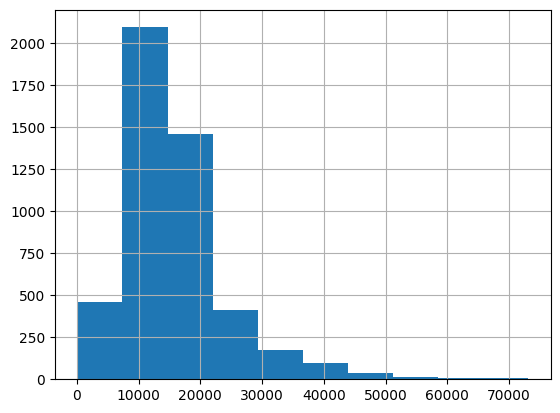

In [292]:
df_bmw12["precio"].hist() #Vemos si aún siguen existiendo outliers

<Axes: xlabel='precio'>

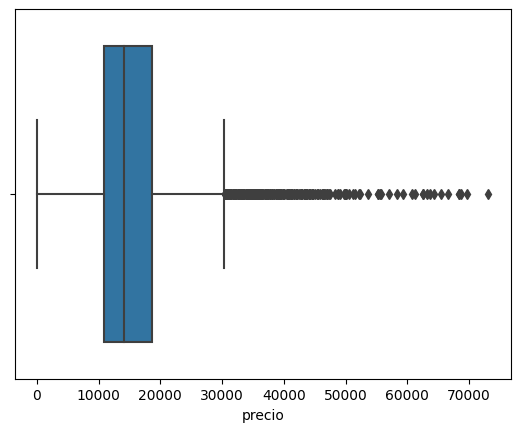

In [295]:
sns.boxplot(x=df_bmw12["precio"])

In [298]:
df_bmw12[df_bmw12["precio"]>70000] #Analizamos si lo consideramos outlier o no

,modelo,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,...,precio,anio_registro,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
4731,X5 M,0.009243,0.647773,True,True,False,True,False,False,False,...,73100.0,2016,0,0,0,0,0,0,1,0


In [311]:
df_bmw12[df_bmw12["modelo"] == "X5 M"] #Lo comparamos vs los otros coches del mismo modelo, para ver si hay diferencias

#Observamos que no existen diferencias significativas, con lo cual dejamos el coche dentro del modelo

,modelo,km,potencia,volante_regulable,aire_acondicionado,camara_trasera,asientos_traseros_plegables,elevalunas_electrico,bluetooth,gps,...,precio,anio_registro,tipo_coche_convertible,tipo_coche_coupe,tipo_coche_estate,tipo_coche_hatchback,tipo_coche_sedan,tipo_coche_subcompact,tipo_coche_suv,tipo_coche_van
3856,X5 M,0.499097,0.344130,True,True,True,True,True,True,True,...,19800.0,2012,0,0,0,0,0,0,1,0
3869,X5 M,0.370994,0.627530,True,True,True,True,True,False,True,...,29200.0,2013,0,0,0,0,0,0,1,0
3893,X5 M,0.068828,0.485830,True,True,False,False,True,False,True,...,41200.0,2014,0,0,0,0,0,0,1,0
4066,X5 M,0.222475,0.647773,True,True,False,True,False,True,True,...,49700.0,2014,0,0,0,0,0,0,1,0
4072,X5 M,0.065595,0.364372,True,True,True,False,True,False,True,...,40900.0,2015,0,0,0,0,0,0,1,0
4110,X5 M,0.058039,0.485830,True,True,False,False,False,False,True,...,63100.0,2016,0,0,0,0,0,0,1,0
4144,X5 M,0.147545,0.485830,True,True,True,False,False,False,False,...,42200.0,2014,0,0,0,0,0,0,1,0
4180,X5 M,0.640910,0.445344,True,True,False,True,True,True,True,...,20600.0,2012,0,0,0,0,0,0,1,0
4219,X5 M,0.243438,0.850202,True,True,True,False,False,False,True,...,44300.0,2014,0,0,0,0,0,0,1,0
4272,X5 M,0.250388,0.344130,True,True,True,True,False,False,True,...,26500.0,2013,0,0,0,0,0,0,1,0


In [ ]:
################################### PRIMER PARTE DEL PROYECTO FINALIZADO #########################

In [ ]:
######### FIN DE ENTREGA #1 ############

In [312]:
df_bmw12.to_pickle("/content/drive/MyDrive/ADB/Master Data Science/Proyecto #1 - BMW/BMW_EntregaFinal") #HACER UN PICKLE - GUARDAR COMO (para no ejecutar cada linea desde el inicio al final)